In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc


In [18]:
import pandas as pd
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [19]:
df.shape

(400, 3)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [21]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [22]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [23]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_scores = model.predict_proba(X_test)[:, 1]
y_scores


array([0.25898334, 0.9667609 , 0.02478589, 0.83206325, 0.01828801,
       0.06009277, 0.85278428, 0.09238639, 0.3740372 , 0.38770021,
       0.14925175, 0.64628566, 0.01136647, 0.00305584, 0.12153469,
       0.39824381, 0.63248732, 0.63513817, 0.15222966, 0.87605724,
       0.00497956, 0.08490702, 0.30216135, 0.95256081, 0.00225016,
       0.47412247, 0.50153983, 0.14876898, 0.97766986, 0.00239315,
       0.3858942 , 0.01077391, 0.70726251, 0.06967441, 0.61612089,
       0.19283149, 0.15675999, 0.23318495, 0.01130247, 0.00845166,
       0.41461855, 0.01685409, 0.00517396, 0.2829944 , 0.00679434,
       0.89976271, 0.04907319, 0.09206765, 0.47554654, 0.0689377 ,
       0.04141681, 0.88941984, 0.1825479 , 0.04266016, 0.28687283,
       0.01396505, 0.9817622 , 0.14751495, 0.10010879, 0.10581095,
       0.25490552, 0.12052218, 0.89552717, 0.08748887, 0.03881973,
       0.2720563 , 0.57808703, 0.94779905, 0.23284475, 0.34861857,
       0.97418291, 0.01701253, 0.03157009, 0.00481975, 0.37815

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_aus = auc(fpr, tpr)

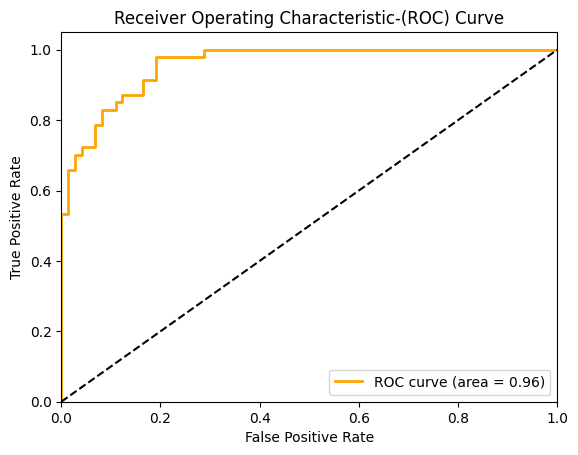

In [37]:
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_aus:.2f})')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-(ROC) Curve')
plt.legend(loc='lower right')
plt.show()